In [0]:
from datascience import *
import numpy as np

In [2]:
path_data = 'https://github.com/data-8/textbook/raw/gh-pages/data/'
little_women = Table.read_table(path_data + 'little_women.csv')
little_women.show(3)

Characters,Periods
21759,189
22148,188
20558,231


In [0]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

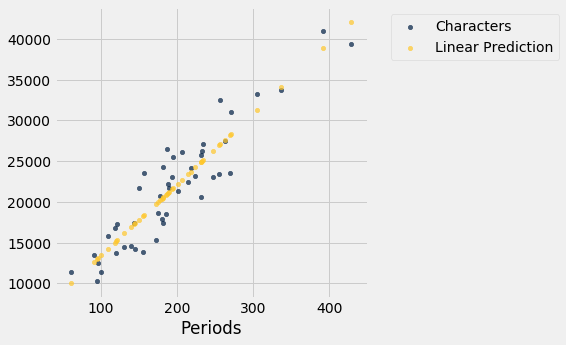

In [4]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
lw_with_predictions = little_women.with_column('Linear Prediction',
                        fit(little_women, 'Periods', 'Characters'))
lw_with_predictions.scatter('Periods')

In [5]:
actual = lw_with_predictions.column('Characters')
predicted = lw_with_predictions.column('Linear Prediction')
errors = actual - predicted
lw_with_predictions.with_column('Error', errors)

Characters,Periods,Linear Prediction,Error
21759,189,21183.6,575.403
22148,188,21096.6,1051.38
20558,231,24836.7,-4278.67
25526,195,21705.5,3820.54
23395,255,26924.1,-3529.13
14622,140,16921.7,-2299.68
14431,131,16138.9,-1707.88
22476,214,23358,-882.043
33767,337,34056.3,-289.317
18508,185,20835.7,-2327.69


In [0]:
lw_reg_slope = slope(little_women, 'Periods', 'Characters')
lw_reg_intercept = intercept(little_women, 'Periods', 'Characters')
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

Slope of Regression Line:     87.0 characters per period
Intercept of Regression Line: 4745.0 characters


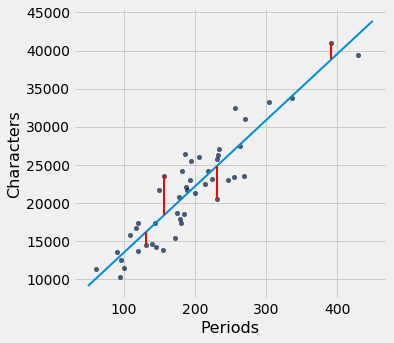

In [7]:
print('Slope of Regression Line:    ', 
      np.round(lw_reg_slope), 'characters per period')
print('Intercept of Regression Line:', 
      np.round(lw_reg_intercept), 'characters')
lw_errors(lw_reg_slope, lw_reg_intercept)

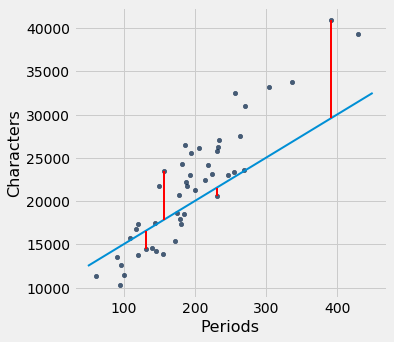

In [8]:
lw_errors(50, 10000)

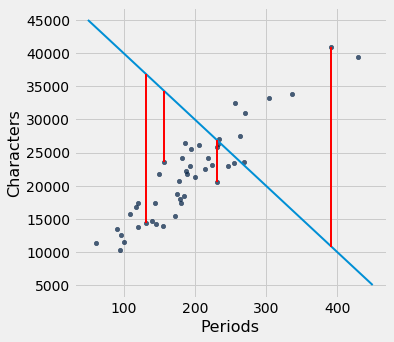

In [9]:
lw_errors(-100, 50000)

In [0]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = slope * x + intercept
    mse = np.mean((y - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

Root mean squared error: 4322.167831766537


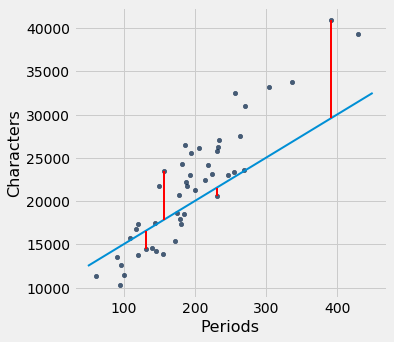

In [11]:
lw_rmse(50, 10000)

Root mean squared error: 2715.5391063834586


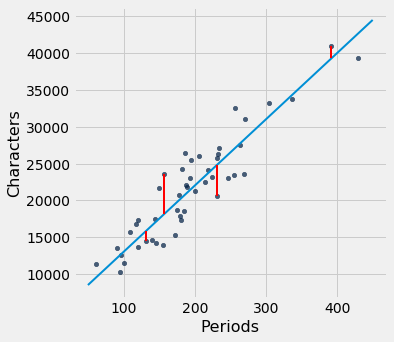

In [12]:
lw_rmse(90, 4000)

Root mean squared error: 2701.690785311856


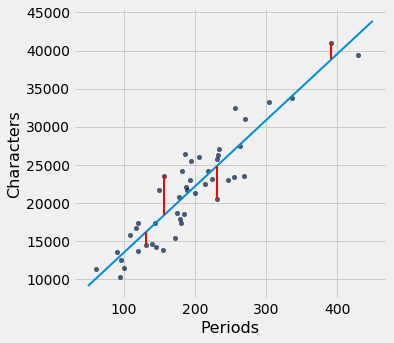

In [13]:
lw_rmse(lw_reg_slope, lw_reg_intercept)

In [14]:
def lw_mse(any_slope, any_intercept):
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

lw_mse(lw_reg_slope, lw_reg_intercept)**0.5

2701.690785311856

In [15]:
best = minimize(lw_mse)
best

array([  86.97784117, 4744.78484535])

In [16]:
print("slope from formula:        ", lw_reg_slope)
print("slope from minimize:       ", best.item(0))
print("intercept from formula:    ", lw_reg_intercept)
print("intercept from minimize:   ", best.item(1))

slope from formula:         86.97784125829821
slope from minimize:        86.97784116615884
intercept from formula:     4744.784796574928
intercept from minimize:    4744.784845352655
